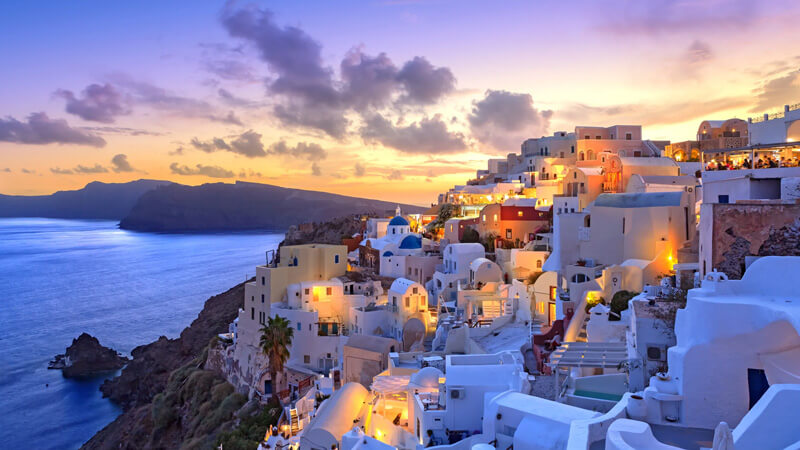

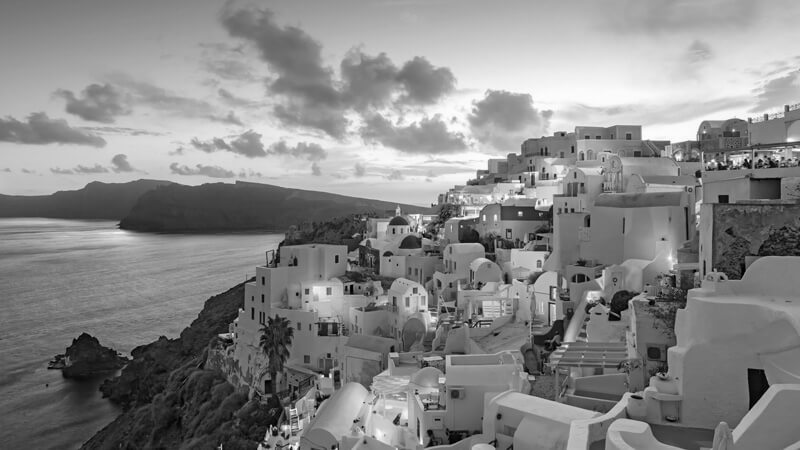

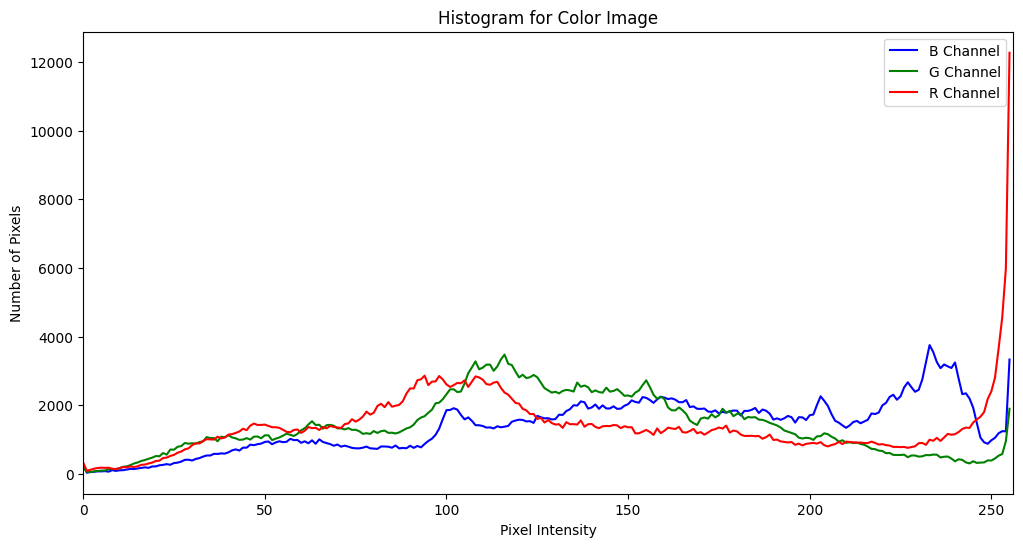

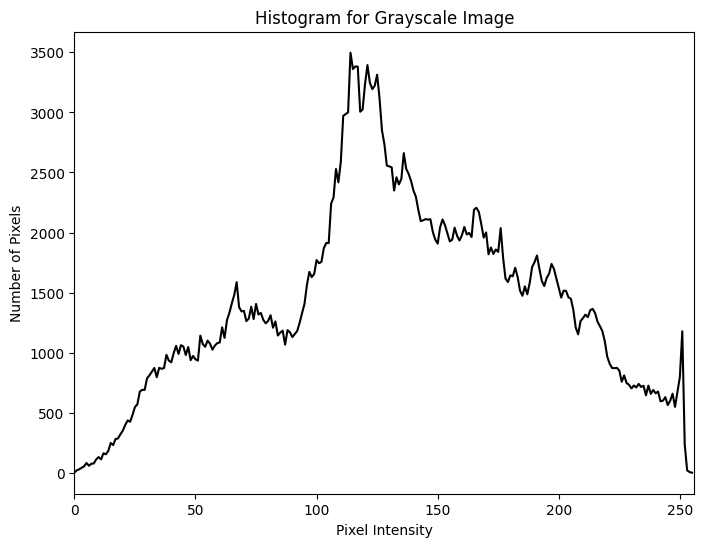

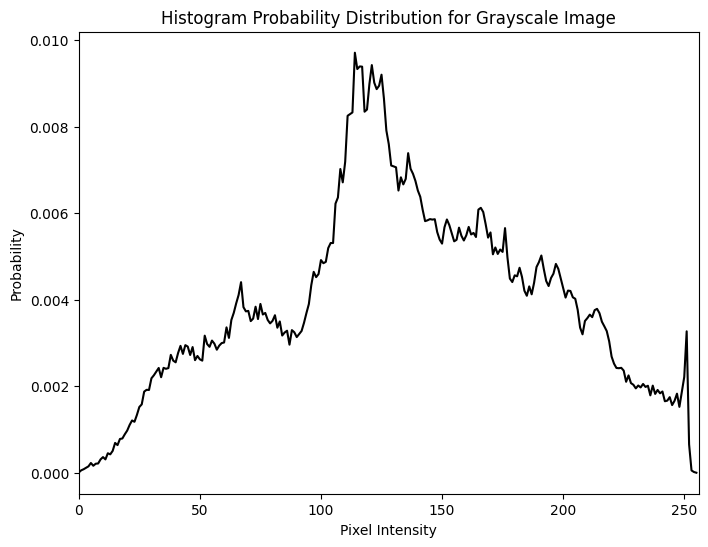

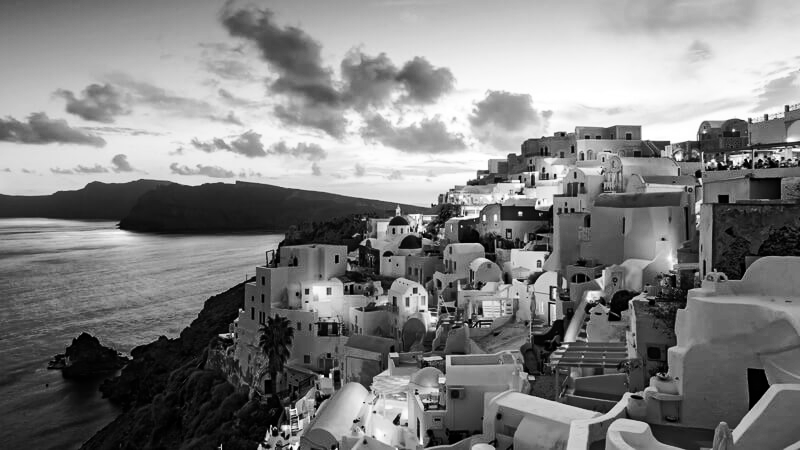

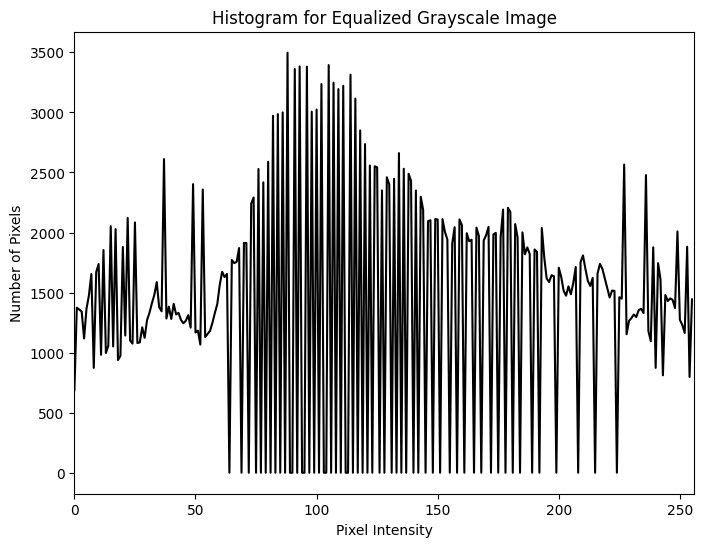

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('/content/img.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


cv2_imshow(image)
cv2_imshow(gray_image)

# Compute histogram for grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Compute histogram for each channel in the color image
color_channels = ('b', 'g', 'r')
plt.figure(figsize=(12, 6))
for i, color in enumerate(color_channels):
    hist_color = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist_color, color=color, label=f'{color.upper()} Channel')
    plt.xlim([0, 256])
plt.title('Histogram for Color Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.legend()
plt.show()

# Display histogram for grayscale image
plt.figure(figsize=(8, 6))
plt.plot(hist_gray, color='black')
plt.title('Histogram for Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])
plt.show()

prob_gray = hist_gray / hist_gray.sum()

plt.figure(figsize=(8, 6))
plt.plot(prob_gray, color='black')
plt.title('Histogram Probability Distribution for Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.xlim([0, 256])
plt.show()

# Histogram Equalization to enhance contrast
equalized_gray = cv2.equalizeHist(gray_image)

# Compute histogram for equalized image
equalized_hist = cv2.calcHist([equalized_gray], [0], None, [256], [0, 256])

# Display Equalized Image
cv2_imshow(equalized_gray)

# Display Histogram for Equalized Image
plt.figure(figsize=(8, 6))
plt.plot(equalized_hist, color='black')
plt.title('Histogram for Equalized Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.xlim([0, 256])
plt.show()


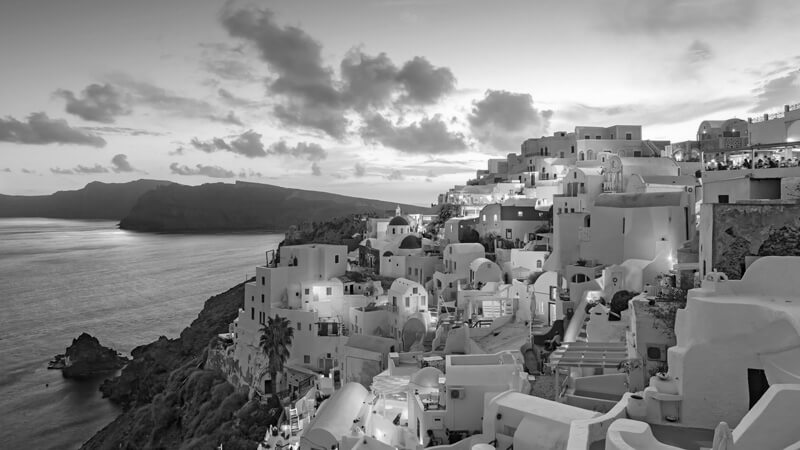

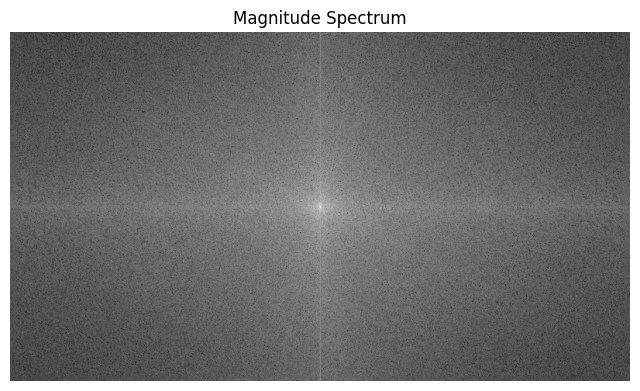

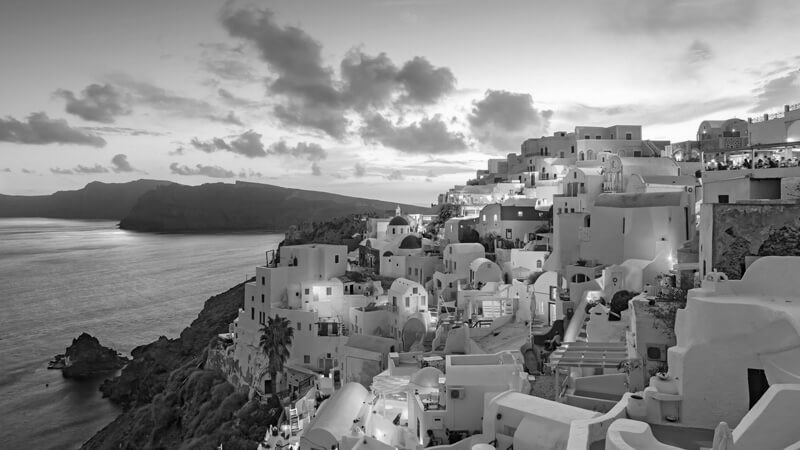

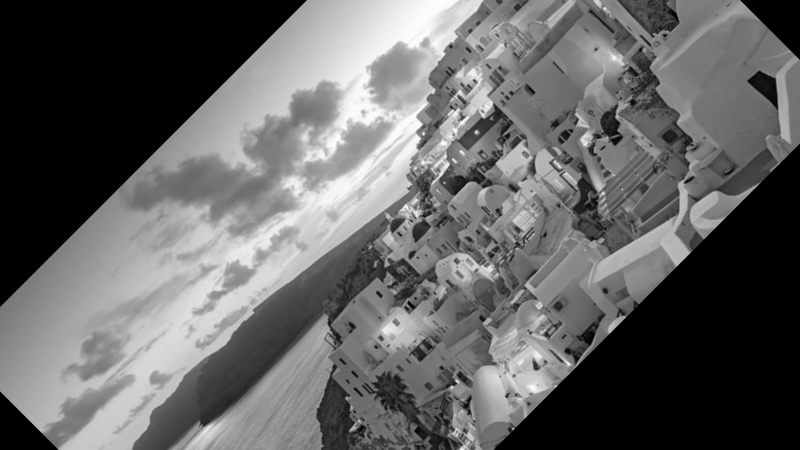

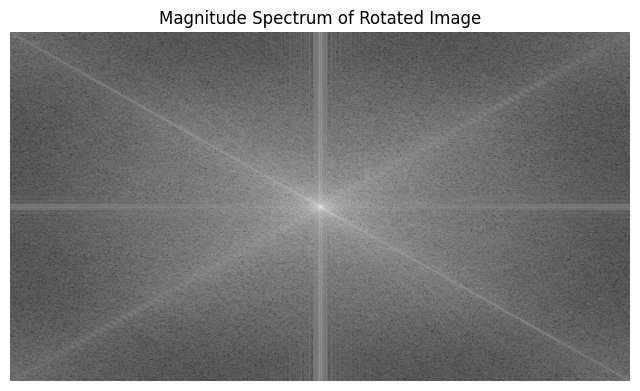

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Load grayscale image
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with actual image path

# Display Original Image
cv2_imshow(image)

# 1️⃣ Compute the Fourier Transform (FT) using FFT
dft = np.fft.fft2(image)  # Compute 2D FFT
dft_shifted = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center
magnitude_spectrum = 20 * np.log(np.abs(dft_shifted))  # Compute log magnitude spectrum for visibility

# Display Magnitude Spectrum
plt.figure(figsize=(8,6))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()

# 2️⃣ Inverse Fourier Transform (Reconstruct Image)
idft_shifted = np.fft.ifftshift(dft_shifted)  # Undo the shift
reconstructed_image = np.fft.ifft2(idft_shifted)  # Compute Inverse FFT
reconstructed_image = np.abs(reconstructed_image)  # Take absolute values for real image

# Display Reconstructed Image
cv2_imshow(reconstructed_image.astype(np.uint8))

# 3️⃣ Rotation Property of Fourier Transform
angle = 45  # Rotate by 45 degrees

# Rotate Image
(h, w) = image.shape
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Compute FFT of Rotated Image
rotated_dft = np.fft.fft2(rotated_image)
rotated_dft_shifted = np.fft.fftshift(rotated_dft)
rotated_magnitude_spectrum = 20 * np.log(np.abs(rotated_dft_shifted))

# Display Rotated Image and its Magnitude Spectrum
cv2_imshow(rotated_image.astype(np.uint8))

plt.figure(figsize=(8,6))
plt.imshow(rotated_magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum of Rotated Image")
plt.axis("off")
plt.show()
